<a href="https://colab.research.google.com/github/narayananjayaratchagan/dse/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Yahoo Finance library

In [1]:
!pip install yfinance


In [2]:
!pip install matplotlib

#Extracting Tesla Stock Data Using yfinance

In [3]:
# Importing the necessary libraries
import yfinance as yf
import pandas as pd

# Define the ticker symbol
tesla_symbol = 'TSLA'

# Get data on this ticker
tesla_data = yf.Ticker(tesla_symbol)

# Get the historical prices for this ticker
tesla_df = tesla_data.history(period='1d', start='2010-1-1', end='2024-6-7')

# Display the first few rows of the dataframe
tesla_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# To extract Tesla's revenue data using web scraping, we can use libraries like requests and BeautifulSoup

In [4]:
!pip install requests beautifulsoup4


#scrap Tesla's revenue data


In [5]:
import re

def remove_non_numeric(input_string):
    # Use regular expression to find all non-numeric characters and remove them
    return re.sub(r'[^0-9.]', '', input_string)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table")
headers = [th.text.strip() for th in table.find_all("th")]
years = []
revenues = []
for tr in table.find_all("tr")[1:]:  # Skip header row
    cells = tr.find_all("td")
    years.append(int(remove_non_numeric(cells[0].text.strip())))
    revenues.append(float(remove_non_numeric(cells[1].text.strip())))
data = {
    'Year' : years,
    'Revenue': revenues
}
tesla_revenue_df = pd.DataFrame.from_records(data)
print(tesla_revenue_df.tail())


<Axes: title={'center': 'Tesla Revenue in Billion'}, xlabel='Year'>

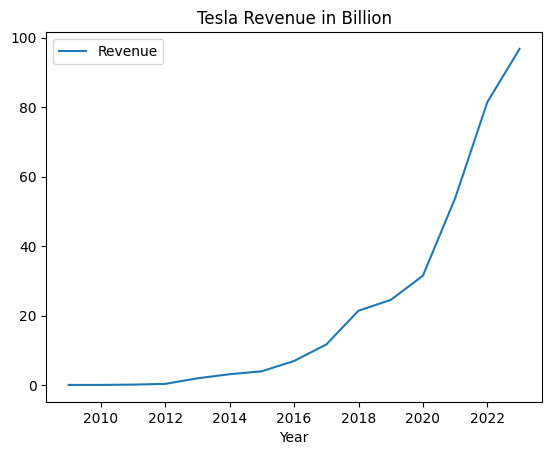

In [10]:
tesla_revenue_df.plot.line(x='Year',y='Revenue',title = 'Tesla Revenue in Billion')

#Get GameStop share price from yfinance

In [11]:
# Define the ticker symbol
gme_symbol = 'GME'

# Get data on this ticker
gme_data = yf.Ticker(tesla_symbol)

# Get the historical prices for this ticker
gme_df = tesla_data.history(period='1d', start='2010-1-1', end='2024-6-7')

# Display the first few rows of the dataframe
gme_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
url = "https://companiesmarketcap.com/gamestop/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table")
years = []
revenues = []
for tr in table.find_all("tr")[1:]:  # Skip header row
    cells = tr.find_all("td")
    years.append(int(remove_non_numeric(cells[0].text.strip())))
    revenues.append(float(remove_non_numeric(cells[1].text.strip())))
data = {
    'Year' : years,
    'Revenue': revenues
}
gme_revenue_df = pd.DataFrame.from_records(data)
print(gme_revenue_df.tail())

    Revenue  Year
18     4.68  2006
19     2.13  2005
20     1.75  2004
21     1.47  2003
22     1.34  2002


<Axes: title={'center': 'GameStop Revenue in Billion'}, xlabel='Year'>

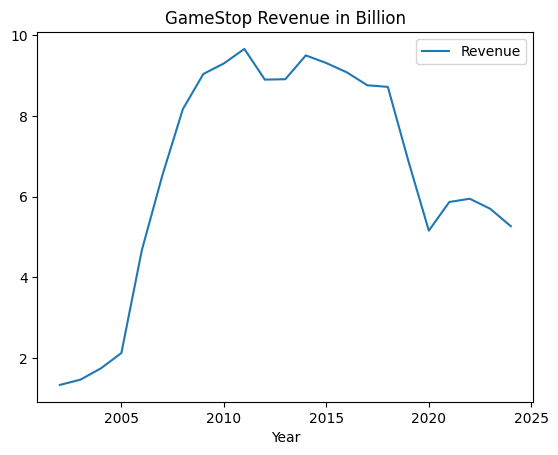

In [13]:
gme_revenue_df.plot.line(x='Year',y='Revenue',title = 'GameStop Revenue in Billion')